Считать данные в pandas dataframe

In [1]:
import pandas as pd
data = pd.read_csv('ex1data1.csv')

Построить scatter plot зависимости прибыли от кол-ва людей в городе

In [2]:
import numpy as np
y = np.array(data.values[:,1])
x = np.array(data.values[:,:1])

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

Найти матрицу Х и вектор у. Нормализировать данные. Добавить колонку единичек к матрице Х (1 балл). 

In [4]:
mean, std = np.mean(x, axis = 0), np.std(x, axis = 0)

In [5]:
x = (x-mean)/std

In [6]:
n = np.shape(x)[0]
ones = np.reshape(np.ones(n),(n,1))
x = np.hstack((x,ones))



4. Написать снова или найти в лекционном ноутбуке фукнции mserror, linear_prediction в матричной форме (то есть НЕ через циклы) (1 балл)

In [7]:
def mserror(y, y_pred):
    return np.mean((y-y_pred)**2)

In [8]:
def normal_equation(x, y):
    return np.linalg.solve(np.dot(x.transpose(),x),np.dot(x.transpose(),y))

In [9]:
norm_eq_weights = normal_equation(x, y)
print(norm_eq_weights)

[4.59304113 5.83913505]


In [10]:
def linear_prediction(x, w):
    return np.dot(x,w)

Найти коэффициенты линейной модели методами:

Стохастический:

In [11]:
def stochastic_gradient_step(x, y, w, train_ind, eta=0.01):
    return w + 2 * eta/x.shape[0] * x[train_ind] * (y[train_ind] - linear_prediction(x[train_ind], w))

In [12]:
def stochastic_gradient_descent(x, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(x.shape[0])
        
        w_new = stochastic_gradient_step(x, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        errors.append(mserror(y, linear_prediction(x, w)))
        iter_num += 1

        
    return w, errors

In [13]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(x, y, np.zeros(x.shape[1]),max_iter=1e5)

Wall time: 3.66 s


Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std', 'mean', 'ones']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'MSE')

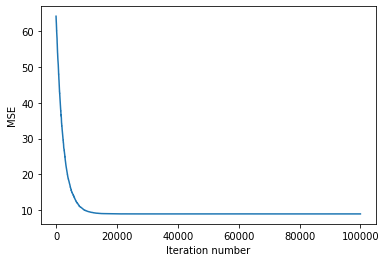

In [14]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [15]:
print(stoch_grad_desc_weights)

[4.62451163 5.85776818]


In [16]:
print(stoch_errors_by_iter[-1])

8.95528033751756


Batch:

In [17]:
def batch_gradient_descent(x, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, verbose=False):
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    while weight_dist > min_weight_dist and iter_num < max_iter:
        w_new = w + 2 * eta/x.shape[0] * (x.T.dot((y - linear_prediction(x, w))))
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        errors.append(mserror(y, linear_prediction(x, w)))
        iter_num += 1

        
    return w, errors

In [18]:
%%time
batch_desc_weights, batch_errors_by_iter = batch_gradient_descent(x, y, np.zeros(x.shape[1]),max_iter=1e3)

Wall time: 36 ms


Text(0, 0.5, 'MSE')

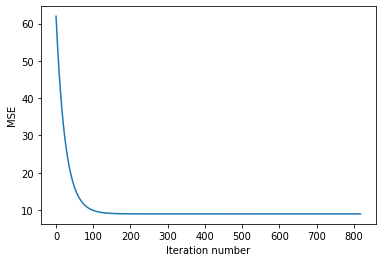

In [19]:
plot(range(len(batch_errors_by_iter)), batch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [20]:
print(batch_desc_weights)

[4.59304083 5.83913467]


In [21]:
print(batch_errors_by_iter[-1])

8.95394275195059


MiniBatch:

In [22]:
def minibatch_gradient_descent(n, x, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, verbose=False):
    #n - количество минибатчей
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    batch_size = x.shape[0] // n
    while weight_dist > min_weight_dist and iter_num < max_iter:
        for i in range(0,n-1):    
            w_new = w + 2 * eta/x[batch_size*i : batch_size+i*batch_size].shape[0] * (x[batch_size*i : batch_size+i*batch_size].T.dot((y[batch_size*i : batch_size+i*batch_size] - linear_prediction(x[batch_size*i : batch_size+i*batch_size], w))))
            weight_dist = np.linalg.norm(w-w_new)
            w = w_new
#           errors.append(mserror(y, linear_prediction(x, w)))
        if(x.shape[0] % n != 0) :   
            w_new = w + 2 * eta/x[batch_size*(n-1) :].shape[0] * (x[batch_size*(n-1) :].T.dot((y[batch_size*(n-1) :] - linear_prediction(x[batch_size*(n-1) :], w))))
            weight_dist = np.linalg.norm(w-w_new)
            w = w_new
        errors.append(mserror(y, linear_prediction(x, w)))
        iter_num += 1

        
    return w, errors

In [23]:
%%time
minibatch_desc_weights, mini_errors_by_iter = minibatch_gradient_descent(3, x, y, np.zeros(x.shape[1]),max_iter=1e3)

Wall time: 84 ms


Text(0, 0.5, 'MSE')

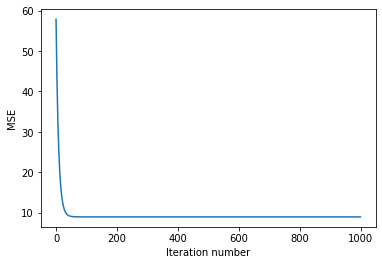

In [24]:
plot(range(len(mini_errors_by_iter)), mini_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [25]:
print(minibatch_desc_weights)

[4.59143288 5.82894631]


In [26]:
print(mini_errors_by_iter[-1])

8.954049148794168


Из библиотеки:

In [30]:
%%time
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(x, y)
print(reg.coef_)

[4.59304113 5.83913505]
Wall time: 4 ms


На мою думку найкращою була модель Full batch gradient descent, оскільки вона дала точний результат при 10^3 ітераціях, при цьому була швидшою за Mini batch. Думаю, що цей результат залежав від невеликого розміру вибірки. 